In [1]:
import pandas as pd

**Collection of Data**

In [2]:
legitimate_urls = pd.read_csv("C:extracted_csv_files/legitimate-urls.csv")
phishing_urls = pd.read_csv("C:extracted_csv_files/phishing-urls.csv")

In [3]:
legitimate_urls.head(10)
phishing_urls.head(10)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,asesoresvelfit.com,0,0,/media/datacredito.co/,0,http,0,0,0,0,0,1,0,1,0,1,1
1,caixa.com.br.fgtsagendesaqueconta.com,0,0,/consulta8523211/principal.php,0,http,0,1,1,0,0,1,0,1,1,0,1
2,hissoulreason.com,0,0,/js/homepage/home/,0,http,0,0,0,0,0,1,0,1,0,0,1
3,unauthorizd.newebpage.com,0,0,/webapps/66fbf/,0,http,0,0,0,0,0,1,0,1,1,0,1
4,133.130.103.10,0,1,/23/,0,http,0,2,0,1,0,1,0,1,0,0,1
5,dj00.co.vu,1,0,/css/,0,http,0,0,2,1,1,1,0,1,1,0,0
6,133.130.103.10,0,1,/21/logar/,0,http,0,2,0,1,0,1,0,1,0,0,1
7,httpssicredi.esy.es,0,0,/servico/sicredi/validarclientes/mobi/index.php,0,http,0,2,2,1,1,1,1,1,1,0,1
8,gamesaty.ga,0,0,/wp-content///yh/en/,0,http,1,0,2,1,0,1,0,1,0,0,1
9,luxuryupgradepro.com,0,0,/ymailNew/ymailNew/,0,http,0,0,0,0,0,1,0,1,0,0,1


## Data PreProcessing
#### Data is in two data frames so we merge them to make one dataframe
Note: two dataframes has same column names

In [4]:
urls = legitimate_urls.append(phishing_urls)


C:\Users\MILAN\AppData\Local\Temp\ipykernel_21788\2937607546.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  urls = legitimate_urls.append(phishing_urls)


In [5]:
urls.head(5)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic
0,www.liquidgeneration.com,0,0,/,0,http,0,0,0,0,0,1,0,0,0,0,2
1,www.onlineanime.org,0,0,/,0,http,0,0,0,0,0,1,0,0,1,0,1
2,www.ceres.dti.ne.jp,0,0,/~nekoi/senno/senfirst.html,0,http,0,1,0,1,0,1,0,0,0,0,0
3,www.galeon.com,0,0,/kmh/,0,http,0,0,0,0,0,0,0,0,0,0,0
4,www.fanworkrecs.com,0,0,/,0,http,0,0,0,1,1,1,0,0,1,0,1


In [6]:
urls.shape[1]

17

In [7]:
urls.columns

Index(['Domain', 'Having_@_symbol', 'Having_IP', 'Path',
       'Prefix_suffix_separation', 'Protocol', 'Redirection_//_symbol',
       'Sub_domains', 'URL_Length', 'age_domain', 'dns_record',
       'domain_registration_length', 'http_tokens', 'label',
       'statistical_report', 'tiny_url', 'web_traffic'],
      dtype='object')

#### Removing Unnecessary columns

In [8]:
urls = urls.drop(urls.columns[[0,3,5]],axis=1)

#### Since we merged two dataframes top 1000 rows will have legitimate urls and bottom 1000 rows will have phishing urls. So if we split the data now and create a model for it will overfit so we need to shuffle the rows before splitting the data into training set and test set

In [9]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urls = urls.sample(frac=1).reset_index(drop=True)

#### Removing class variable from the dataset

In [10]:
urls_without_labels = urls.drop('label',axis=1)
urls_without_labels.columns
labels = urls['label']


#### splitting the data into train data and test data

Dividing the data in the ratio of 70:30 [train_data:test_data]

In [11]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(
    urls_without_labels, labels, test_size=0.30, random_state=110)


In [12]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1410 605 1410 605


#### checking the split of labels in train and test data

The split should be in equal proportion for both classes

Phishing - 1

Legitimate - 0


In [13]:
#initially checking the split of labels_train data 
labels_train.value_counts()


1    709
0    701
Name: label, dtype: int64

By above results it is shown that the split of both classes are almost equal!

Testing the same for labels of test data also

In [14]:
#checking the split for labels_test data
labels_test.value_counts()

0    316
1    289
Name: label, dtype: int64

as the split is almost in equal proportion we can train the model

#### Creating the model and fitting the data into the model

creating the model with default parameters

In [15]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

In [16]:
random_forest_classifier.fit(data_train,labels_train)


RandomForestClassifier()

#### Predicting the result for test data

In [17]:
prediction_label = random_forest_classifier.predict(data_test)

#### Creating confusion matrix and checking the accuracy

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cpnfusionMatrix = confusion_matrix(labels_test,prediction_label)
print(cpnfusionMatrix)
accuracy_score(labels_test,prediction_label)

[[280  36]
 [ 59 230]]


0.8429752066115702

### Improving the efficiency of model by specifying max_depth as well as number of tress 

In [19]:
custom_random_forest_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, max_leaf_nodes=10000)

In [20]:
custom_random_forest_classifier.fit(data_train,labels_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=10000, n_estimators=500)

In [21]:
custom_classifier_prediction_label = custom_random_forest_classifier.predict(data_test)

In [22]:
#from sklearn.metrics import confusion_matrix,accuracy_score
confusionMatrix2 = confusion_matrix(labels_test,custom_classifier_prediction_label)
print(confusionMatrix2)
accuracy_score(labels_test,custom_classifier_prediction_label)

[[280  36]
 [ 59 230]]


0.8429752066115702

## Feature Importance Plot

indices of columns : [ 5 12 10  6  8  4  7  2 11  1  0  3  9]

 ***Feature ranking: *** 

Feature name : Importance
1 URL_Length   :  0.2053912412593934 

2 web_traffic   :  0.20156270330008197 

3 statistical_report   :  0.1423035385349812 

4 age_domain   :  0.09003163784556319 

5 domain_registration_length   :  0.07788708003928572 

6 Sub_domains   :  0.07590607676409636 

7 dns_record   :  0.07449967997211139 

8 Prefix_suffix_separation   :  0.0612584390476369 

9 tiny_url   :  0.04939285770797034 

10 Having_IP   :  0.008661241711961597 

11 Having_@_symbol   :  0.0062133058873598615 

12 Redirection_//_symbol   :  0.005885964149467693 

13 http_tokens   :  0.0010062337800904857 

**** The blue bars are the feature importances of the randomforest classifier, along with their inter-trees variability*****


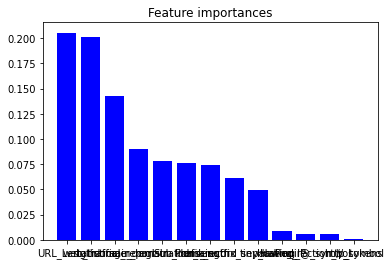

In [23]:
import matplotlib.pyplot as plt
import numpy as np

#feature_importances_ : array of shape = [n_features] ------ The feature importances (the higher, the more important the feature).

#feature_importances_  -- This method returns the quantified relative importance in the order the features were fed to the algorithm

importances = custom_random_forest_classifier.feature_importances_

#std = np.std([tree.feature_importances_ for tree in custom_random_forest_classifier.estimators_],axis=0)   #[[[estimators_ :explaination ---  list of DecisionTreeClassifier ----- (The collection of fitted sub-estimators.)]]]

#To make the plot pretty, we’ll instead sort the features from most to least important.
indices = np.argsort(importances)[::-1] 
print(f"indices of columns : {indices}")

# Print the feature ranking
print("\n ***Feature ranking: *** \n")
print("Feature name : Importance")

for f in range(data_train.shape[1]):
    print(f"{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} \n")
    
print("**** The blue bars are the feature importances of the randomforest classifier, along with their inter-trees variability*****")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_train.shape[1]), importances[indices],
       color="b", align="center")   
#yerr=std[indices] -- this is another parameter that can be included if std is calculated above
#and also it gives error bar that's the reason we calculate std above. but here we are not making it plot.

plt.xticks(range(data_train.shape[1]), data_train.columns[indices])
plt.xlim([-1, data_train.shape[1]])

plt.rcParams['figure.figsize'] = (35,15)  #this will increase the size of the plot
plt.show()

In [24]:
#click on the image to get clear view